A short tutorial on wavelets
============================

Import Python modules

In [12]:
%matplotlib inline
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import numpy as np

from math import pi
from scipy.fftpack import fft

In [13]:
import sys
sys.path.append("../src")
import DWT, MODWT

In [14]:
params = {'legend.fontsize': 20, \
          'axes.labelsize': 24, \
          'xtick.labelsize':24, \
          'ytick.labelsize':24}
pylab.rcParams.update(params)   

# I Motivation

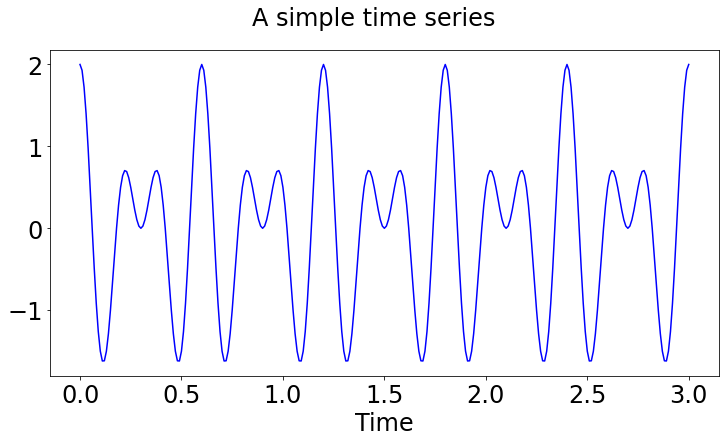

In [15]:
N = 300
dt = 0.01
t = np.linspace(0, N * dt, N + 1)
signal = np.cos(2.0 * pi * t / 0.2) + np.cos(2.0 * pi * t / 0.3)
fig1 = plt.figure(1, figsize=(12, 6))
plt.plot(t, signal, 'b-')
plt.xlabel('Time')
plt.suptitle('A simple time series', fontsize=24)
plt.savefig('../tutorial/figures/Figure1.eps', format='eps')
plt.show()

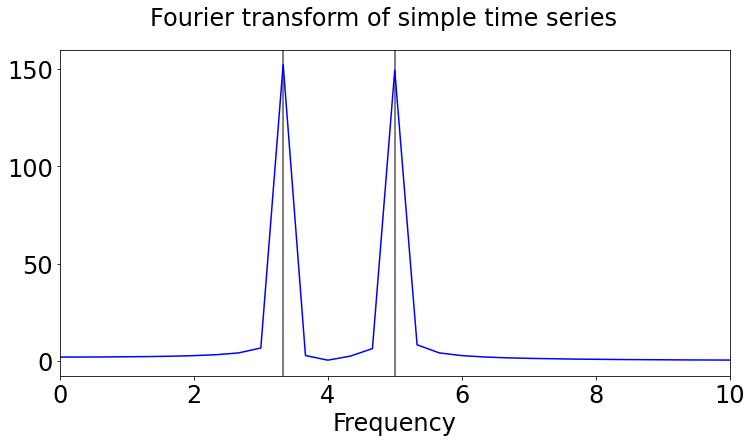

In [16]:
fsignal = np.abs(fft(signal))[0 : int(N / 2) + 1]
f = np.linspace(0, 1.0 / (2.0 * dt), int(N / 2) + 1)
fig2 = plt.figure(2, figsize=(12, 6))
plt.axvline(1 / 0.2, linewidth=2, color='grey')
plt.axvline(1 / 0.3, linewidth=2, color='grey')
plt.plot(f, fsignal, 'b-')
plt.xlabel('Frequency')
plt.xlim([0.0, 10.0])
plt.suptitle('Fourier transform of simple time series', fontsize=24)
plt.savefig('../tutorial/figures/Figure2.eps', format='eps')
plt.show()

Division into 2 time windows with 150 values each. Frequency step = 0.667 Hz

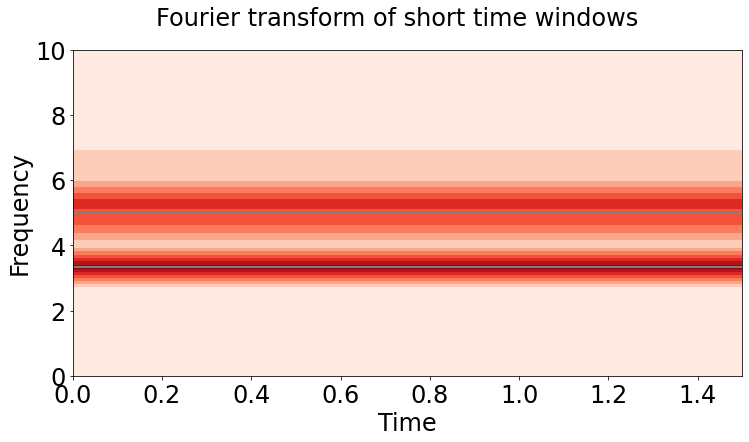

In [17]:
n = 2
time_freq = np.zeros((int(N / (2 * n) + 1), n))
for i in range(0, n):
    t_sub = t[int(N * i / n) : int(N * (i + 1) / n + 1)]
    signal_sub = signal[int(N * i / n) : int(N * (i + 1) / n + 1)]
    fsignal_sub = np.abs(fft(signal_sub))[0 : int(N / (2 * n) + 1)]
    time_freq[:, i] = fsignal_sub
f_sub = np.linspace(0, 1.0 / (2.0 * dt), int(N / (2 * n) + 1))
fig3 = plt.figure(3, figsize=(12, 6))
plt.axhline(1 / 0.2, linewidth=2, color='grey')
plt.axhline(1 / 0.3, linewidth=2, color='grey')
plt.contourf(np.linspace(0, N * dt * (1 - 1.0 / n), n), f_sub, time_freq, cmap=plt.get_cmap('Reds'))
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.ylim([0.0, 10.0])
plt.suptitle('Fourier transform of short time windows', fontsize=24)
plt.savefig('../tutorial/figures/Figure3.eps', format='eps')
plt.show()

Division into 10 time windows with 30 values each. Frequency step = 3.33 Hz

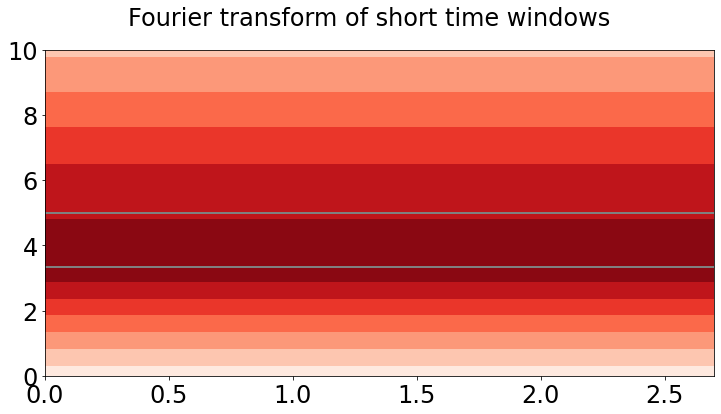

In [18]:
n = 10
time_freq = np.zeros((int(N / (2 * n) + 1), n))
for i in range(0, n):
    t_sub = t[int(N * i / n) : int(N * (i + 1) / n+ 1)]
    signal_sub = signal[int(N * i / n) : int(N * (i + 1) / n+ 1)]
    fsignal_sub = np.abs(fft(signal_sub))[0 : int(N / (2 * n) + 1)]
    time_freq[:, i] = fsignal_sub
f_sub = np.linspace(0, 1.0 / (2.0 * dt), int(N / (2 * n) + 1))
fig4 = plt.figure(4, figsize=(12, 6))
plt.axhline(1 / 0.2, linewidth=2, color='grey')
plt.axhline(1 / 0.3, linewidth=2, color='grey')
plt.contourf(np.linspace(0, N * dt * (1 - 1.0 / n), n), f_sub, time_freq, cmap=plt.get_cmap('Reds'))
plt.ylim([0.0, 10.0])
plt.suptitle('Fourier transform of short time windows', fontsize=24)
plt.savefig('../tutorial/figures/Figure4.eps', format='eps')
plt.show()

# II What is wavelet decomposition?

## 1) First way of describing the time series: Euclidean basis

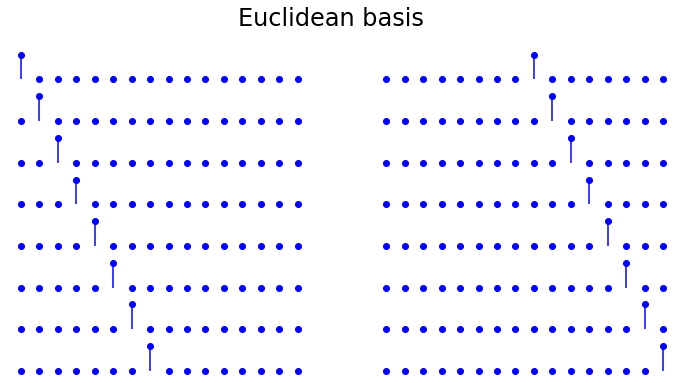

In [19]:
fig5 = plt.figure(5, figsize=(12, 6))
for i in range(0, 8):
    ax1 = plt.subplot2grid((8, 2), (i, 0))
    ax1.set_frame_on(False)
    ax1.axes.get_xaxis().set_visible(False)
    ax1.axes.get_yaxis().set_visible(False)
    basis_vector = np.zeros(16)
    basis_vector[i] = 1
    plt.stem(np.arange(0, 16), basis_vector, 'b-', markerfmt='bo', basefmt=' ')
    ax1.set_ylim(-0.2, 1.2)
for i in range(0, 8):
    ax1 = plt.subplot2grid((8, 2), (i, 1))
    ax1.set_frame_on(False)
    ax1.axes.get_xaxis().set_visible(False)
    ax1.axes.get_yaxis().set_visible(False)
    basis_vector = np.zeros(16)
    basis_vector[8 + i] = 1
    plt.stem(np.arange(0, 16), basis_vector, 'b-', markerfmt='bo', basefmt=' ')
    ax1.set_ylim(-0.2, 1.2)
plt.suptitle('Euclidean basis', fontsize=24)
plt.savefig('../tutorial/figures/Figure5.eps', format='eps')
plt.show()

Let us look at a time series

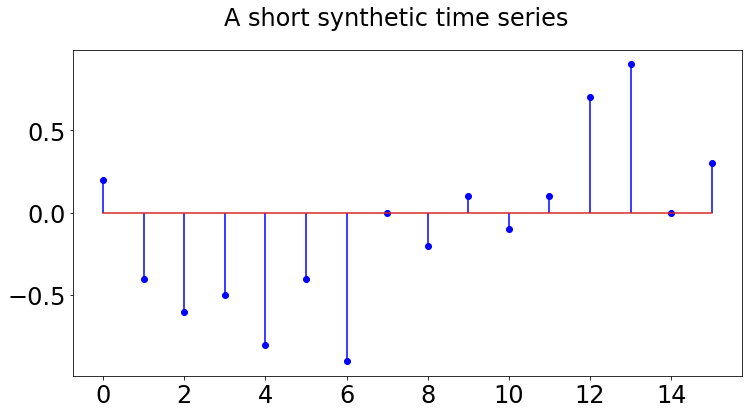

In [20]:
X = np.loadtxt('../data/ts16a.dat')
fig6 = plt.figure(6, figsize=(12, 6))
plt.stem(np.arange(0, 16), X, 'b-', markerfmt='bo')
plt.suptitle('A short synthetic time series', fontsize=24)
plt.savefig('../tutorial/figures/Figure6.eps', format='eps')
plt.show()

We multiply each vector of the Euclidean basis by the appropriate coefficient:

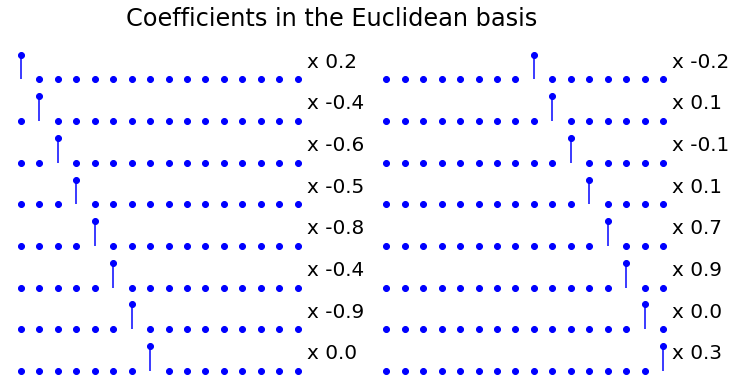

In [21]:
fig7 = plt.figure(7, figsize=(12, 6))
for i in range(0, 8):
    ax1 = plt.subplot2grid((8, 2), (i, 0))
    ax1.set_frame_on(False)
    ax1.axes.get_xaxis().set_visible(False)
    ax1.axes.get_yaxis().set_visible(False)
    basis_vector = np.zeros(16)
    basis_vector[i] = 1
    plt.stem(np.arange(0, 16), basis_vector, 'b-', markerfmt='bo', basefmt=' ')
    ax1.set_ylim(-0.2, 1.2)
    ax1.annotate('x {}'.format(X[i]), xy=(15.5, 0.5), fontsize=20)
for i in range(0, 8):
    ax1 = plt.subplot2grid((8, 2), (i, 1))
    ax1.set_frame_on(False)
    ax1.axes.get_xaxis().set_visible(False)
    ax1.axes.get_yaxis().set_visible(False)
    basis_vector = np.zeros(16)
    basis_vector[8 + i] = 1
    plt.stem(np.arange(0, 16), basis_vector, 'b-', markerfmt='bo', basefmt=' ')
    ax1.set_ylim(-0.2, 1.2)
    ax1.annotate('x {}'.format(X[8 + i]), xy=(15.5, 0.5), fontsize=20)
plt.suptitle('Coefficients in the Euclidean basis', fontsize=24)
plt.savefig('../tutorial/figures/Figure7.eps', format='eps')
plt.show()

and sum them to get the time series

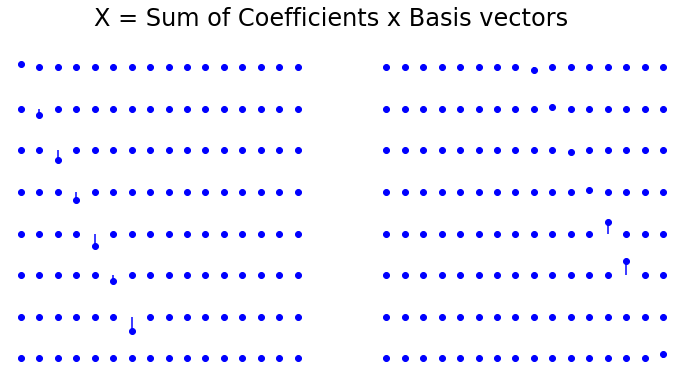

In [22]:
fig8 = plt.figure(8, figsize=(12, 6))
for i in range(0, 8):
    ax1 = plt.subplot2grid((8, 2), (i, 0))
    ax1.set_frame_on(False)
    ax1.axes.get_xaxis().set_visible(False)
    ax1.axes.get_yaxis().set_visible(False)
    basis_vector = np.zeros(16)
    basis_vector[i] = X[i]
    plt.stem(np.arange(0, 16), basis_vector, 'b-', markerfmt='bo', basefmt=' ')
    ax1.set_ylim(-1.1, 1.1)
for i in range(0, 8):
    ax1 = plt.subplot2grid((8, 2), (i, 1))
    ax1.set_frame_on(False)
    ax1.axes.get_xaxis().set_visible(False)
    ax1.axes.get_yaxis().set_visible(False)
    basis_vector = np.zeros(16)
    basis_vector[8 + i] = X[8 + i]
    plt.stem(np.arange(0, 16), basis_vector, 'b-', markerfmt='bo', basefmt=' ')
    ax1.set_ylim(-1.1, 1.1)
plt.suptitle('X = Sum of Coefficients x Basis vectors', fontsize=24)
plt.savefig('../tutorial/figures/Figure8.eps', format='eps')
plt.show()

## 2) Second way of describing the time series: Wavelet basis

Get the wavelet

In [23]:
g = DWT.get_scaling('D4')
h = DWT.get_wavelet(g)

Compute intermediate values

In [24]:
A1 = DWT.compute_AB(g, 1, 16)
A2 = DWT.compute_AB(g, 2, 16)
A3 = DWT.compute_AB(g, 3, 16)
A4 = DWT.compute_AB(g, 4, 16)
B1 = DWT.compute_AB(h, 1, 16)
B2 = DWT.compute_AB(h, 2, 16)
B3 = DWT.compute_AB(h, 3, 16)
B4 = DWT.compute_AB(h, 4, 16)

Compute the vectors of the wavelet basis

In [25]:
Wcal1 = B1
Wcal2 = np.matmul(B2, A1)
Wcal3 = np.matmul(np.matmul(B3, A2), A1)
Wcal4 = np.matmul(np.matmul(np.matmul(B4, A3), A2), A1)
Vcal4 = np.matmul(np.matmul(np.matmul(A4, A3), A2), A1)
Wcal = np.concatenate((Wcal1, Wcal2, Wcal3, Wcal4, Vcal4), axis=0)

and plot

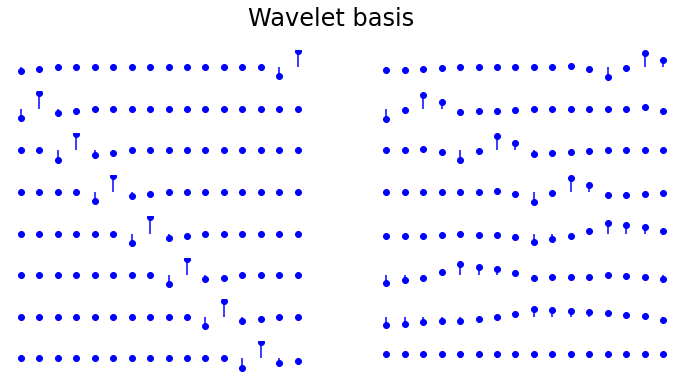

In [26]:
fig9 = plt.figure(9, figsize=(12, 6))
for i in range(0, 8):
    ax1 = plt.subplot2grid((8, 2), (i, 0))
    ax1.set_frame_on(False)
    ax1.axes.get_xaxis().set_visible(False)
    ax1.axes.get_yaxis().set_visible(False)
    basis_vector = np.zeros(16)
    basis_vector[i] = 1
    plt.stem(np.arange(0, 16), Wcal[i, :], 'b-', markerfmt='bo', basefmt=' ')
    ax1.set_ylim(-0.9, 0.9)
for i in range(0, 8):
    ax1 = plt.subplot2grid((8, 2), (i, 1))
    ax1.set_frame_on(False)
    ax1.axes.get_xaxis().set_visible(False)
    ax1.axes.get_yaxis().set_visible(False)
    basis_vector = np.zeros(16)
    basis_vector[8 + i] = 1
    plt.stem(np.arange(0, 16), Wcal[8 + i, :], 'b-', markerfmt='bo', basefmt=' ')
    ax1.set_ylim(-0.9, 0.9)
plt.suptitle('Wavelet basis', fontsize=24)
plt.savefig('../tutorial/figures/Figure9.eps', format='eps')
plt.show()

Get the wavelet coefficients

In [27]:
W = DWT.pyramid(X, 'D4', 4)

We multiply each vector of the Eucliden basis by the appropriate coefficient:

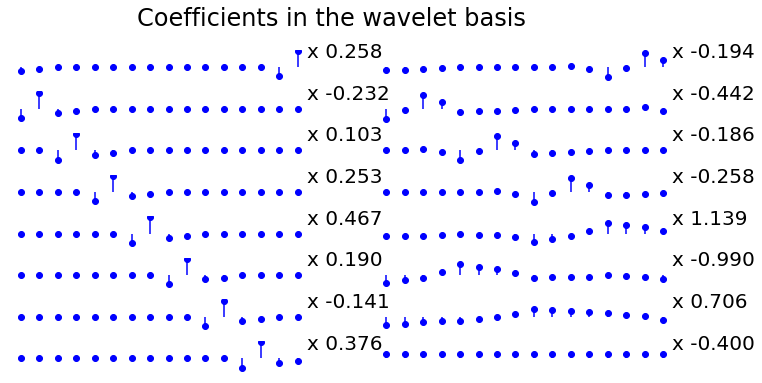

In [28]:
fig10 = plt.figure(10, figsize=(12, 6))
for i in range(0, 8):
    ax1 = plt.subplot2grid((8, 2), (i, 0))
    ax1.set_frame_on(False)
    ax1.axes.get_xaxis().set_visible(False)
    ax1.axes.get_yaxis().set_visible(False)
    plt.stem(np.arange(0, 16), Wcal[i, :], 'b-', markerfmt='bo', basefmt=' ')
    ax1.set_ylim(-0.9, 0.9)
    ax1.annotate('x {:.3f}'.format(W[i]), xy=(15.5, 0.5), fontsize=20)
for i in range(0, 8):
    ax1 = plt.subplot2grid((8, 2), (i, 1))
    ax1.set_frame_on(False)
    ax1.axes.get_xaxis().set_visible(False)
    ax1.axes.get_yaxis().set_visible(False)
    plt.stem(np.arange(0, 16), Wcal[8 + i, :], 'b-', markerfmt='bo', basefmt=' ')
    ax1.set_ylim(-0.9, 0.9)
    ax1.annotate('x {:.3f}'.format(W[8 + i]), xy=(15.5, 0.5), fontsize=20)
plt.suptitle('Coefficients in the wavelet basis', fontsize=24)
plt.savefig('../tutorial/figures/Figure10.eps', format='eps')
plt.show()

and sum them to get the time series

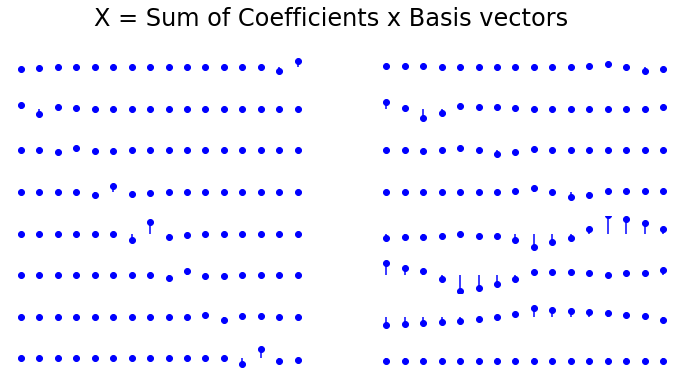

In [29]:
fig11 = plt.figure(11, figsize=(12, 6))
for i in range(0, 8):
    ax1 = plt.subplot2grid((8, 2), (i, 0))
    ax1.set_frame_on(False)
    ax1.axes.get_xaxis().set_visible(False)
    ax1.axes.get_yaxis().set_visible(False)
    plt.stem(np.arange(0, 16), Wcal[i, :] * W[i], 'b-', markerfmt='bo', basefmt=' ')
    ax1.set_ylim(-0.6, 0.6)
for i in range(0, 8):
    ax1 = plt.subplot2grid((8, 2), (i, 1))
    ax1.set_frame_on(False)
    ax1.axes.get_xaxis().set_visible(False)
    ax1.axes.get_yaxis().set_visible(False)
    plt.stem(np.arange(0, 16), Wcal[8 + i, :] * W[8 + i], 'b-', markerfmt='bo', basefmt=' ')
    ax1.set_ylim(-0.6, 0.6)
plt.suptitle('X = Sum of Coefficients x Basis vectors', fontsize=24)
plt.savefig('../tutorial/figures/Figure11.eps', format='eps')
plt.show()

We verify that we have $\mathbb{X} = \mathcal{W}^T \mathbb{W}$

In [30]:
print(X - np.matmul(np.transpose(Wcal), W))

[ 5.55111512e-17 -3.88578059e-16 -5.55111512e-16 -6.10622664e-16
 -8.88178420e-16 -7.77156117e-16 -7.77156117e-16 -3.33066907e-16
 -2.77555756e-17  1.38777878e-16 -8.32667268e-17  2.77555756e-16
  7.77156117e-16  7.77156117e-16  1.66533454e-16  1.11022302e-16]


# III How do we get $\mathcal{W}$ and $\mathbb{W}$?

## 1) Choose a wavelet

The wavelet function must have the following properties:
- $\sum_{l = 0}^{L - 1} h_l = 0$
- $\sum_{l = 0}^{L - 1} h_l^2 = 1$
- $\sum_{l = 0}^{L - 1} h_l h_{l + 2 n} = \sum_{l = - \infty}^{\infty} h_l h_{l + 2 n} = 0$

The corresponding scaling function is:

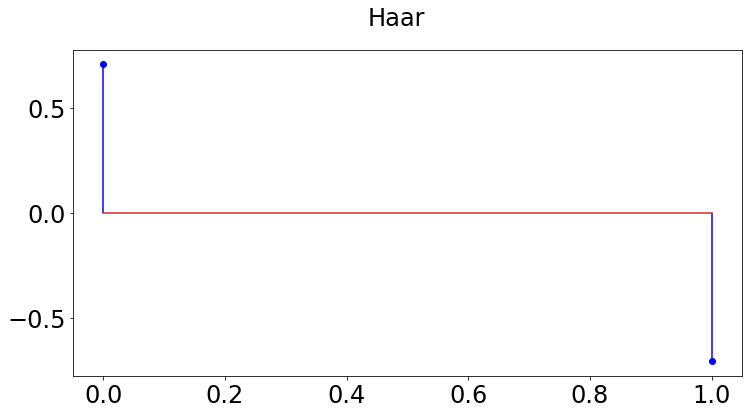

In [31]:
g = DWT.get_scaling('Haar')
h = DWT.get_wavelet(g)
L = np.shape(h)[0]
fig12 = plt.figure(12, figsize=(12, 6))
plt.stem(np.arange(0, L), h, 'b-', markerfmt='bo')
plt.suptitle('Haar', fontsize=24)
plt.savefig('../tutorial/figures/Figure12.eps', format='eps')
plt.show()

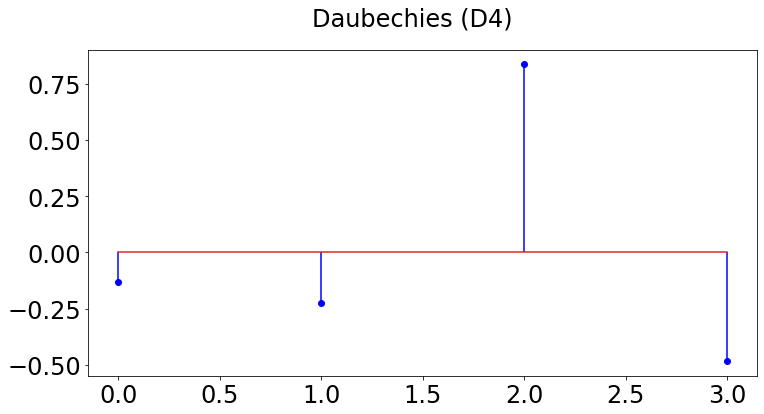

In [32]:
g = DWT.get_scaling('D4')
h = DWT.get_wavelet(g)
L = np.shape(h)[0]
fig12 = plt.figure(12, figsize=(12, 6))
plt.stem(np.arange(0, L), h, 'b-', markerfmt='bo')
plt.suptitle('Daubechies (D4)', fontsize=24)
plt.savefig('../tutorial/figures/Figure13.eps', format='eps')
plt.show()

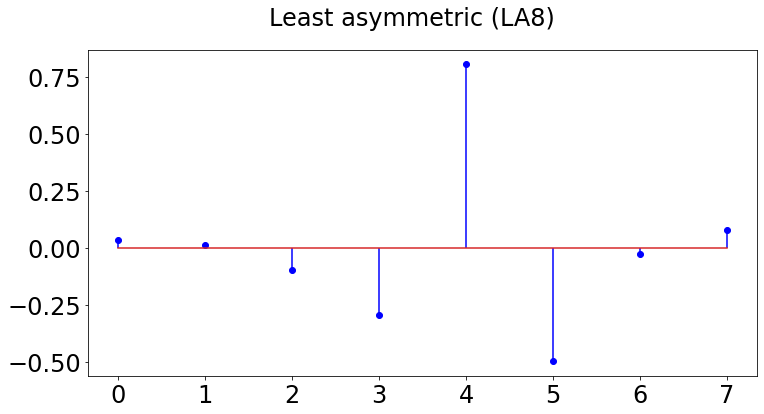

In [33]:
g = DWT.get_scaling('LA8')
h = DWT.get_wavelet(g)
L = np.shape(h)[0]
fig13 = plt.figure(13, figsize=(12, 6))
plt.stem(np.arange(0, L), h, 'b-', markerfmt='bo')
plt.suptitle('Least asymmetric (LA8)', fontsize=24)
plt.savefig('../tutorial/figures/Figure14.eps', format='eps')
plt.show()

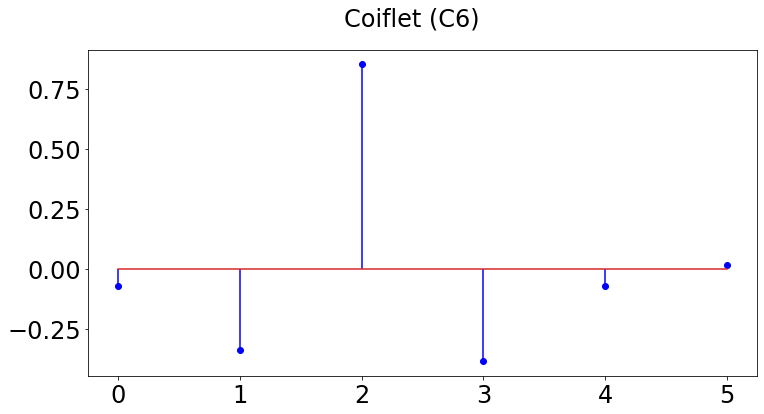

In [34]:
g = DWT.get_scaling('C6')
h = DWT.get_wavelet(g)
L = np.shape(h)[0]
fig14 = plt.figure(14, figsize=(12, 6))
plt.stem(np.arange(0, L), h, 'b-', markerfmt='bo')
plt.suptitle('Coiflet (C6)', fontsize=24)
plt.savefig('../tutorial/figures/Figure15.eps', format='eps')
plt.show()

## 2) Pyramid algorithm

In [35]:
g = DWT.get_scaling('D4')
h = DWT.get_wavelet(g)

### First step

<img src="../tutorial/step1.png" width="500">

Time series $X_t$ with $t = 0 , \cdots , N - 1$ is decomposed into wavelet vector at scale 1 $W_{1 , t}$ with $t = 0 , \cdots , \frac{N}{2} - 1$ and scaling vector at scale 1 $V_{1 , t}$ with $t = 0 , \cdots , \frac{N}{2} - 1$

We have:
$W_{1 , t} = \sum_{l = 0}^{L - 1} h_l X_{2 t + 1 - l \mod N}$ and $V_{1 , t} = \sum_{l = 0}^{L - 1} g_l X_{2 t + 1 - l \mod N}$

In [36]:
N = np.shape(X)[0]
N2 = int(N / 2)
W1 = np.zeros(N2)
V1 = np.zeros(N2)
L = np.shape(h)[0]
for t in range(0, N2):
    for l in range(0, L):
        index = (2 * t + 1 - l) % N
        W1[t] = W1[t] + h[l] * X[index]
        V1[t] = V1[t] + g[l] * X[index]

### Second step

<img src="../tutorial/step2.png" width="500">

Time series $V_{1, t}$ with $t = 0 , \cdots , \frac{N}{2} - 1$ is decomposed into wavelet vector at scale 2 $W_{2 , t}$ with $t = 0 , \cdots , \frac{N}{4} - 1$ and scaling vector at scale 2 $V_{2 , t}$ with $t = 0 , \cdots , \frac{N}{4} - 1$

We have:
$W_{2 , t} = \sum_{l = 0}^{L - 1} h_l V_{1 , 2 t + 1 - l \mod \frac{N}{2}}$ and $V_{2 , t} = \sum_{l = 0}^{L - 1} g_l V_{1 , 2 t + 1 - l \mod \frac{N}{2}}$

In [37]:
N4 = int(N / 4)
W2 = np.zeros(N4)
V2 = np.zeros(N4)
for t in range(0, N4):
    for l in range(0, L):
        index = (2 * t + 1 - l) % int(N / 2)
        W2[t] = W2[t] + h[l] * V1[index]
        V2[t] = V2[t] + g[l] * V1[index]

### Third step

<img src="../tutorial/step3.png" width="500">

Time series $V_{2, t}$ with $t = 0 , \cdots , \frac{N}{4} - 1$ is decomposed into wavelet vector at scale 3 $W_{3 , t}$ with $t = 0 , \cdots , \frac{N}{8} - 1$ and scaling vector at scale 3 $V_{3 , t}$ with $t = 0 , \cdots , \frac{N}{8} - 1$

We have:
$W_{3 , t} = \sum_{l = 0}^{L - 1} h_l V_{2 , 2 t + 1 - l \mod \frac{N}{4}}$ and $V_{3 , t} = \sum_{l = 0}^{L - 1} g_l V_{2 , 2 t + 1 - l \mod \frac{N}{4}}$

In [38]:
N8 = int(N / 8)
W3 = np.zeros(N8)
V3 = np.zeros(N8)
for t in range(0, N8):
    for l in range(0, L):
        index = (2 * t + 1 - l) % int(N / 4)
        W3[t] = W3[t] + h[l] * V2[index]
        V3[t] = V3[t] + g[l] * V2[index]

### Fourth step

<img src="../tutorial/step4.png" width="500">

Time series $V_{3, t}$ with $t = 0 , \cdots , \frac{N}{8} - 1$ is decomposed into wavelet vector at scale 4 $W_{4 , t}$ with $t = 0 , \cdots , \frac{N}{16} - 1$ and scaling vector at scale 4 $V_{4 , t}$ with $t = 0 , \cdots , \frac{N}{16} - 1$

We have:
$W_{4 , t} = \sum_{l = 0}^{L - 1} h_l V_{3 , 2 t + 1 - l \mod \frac{N}{8}}$ and $V_{4 , t} = \sum_{l = 0}^{L - 1} g_l V_{3 , 2 t + 1 - l \mod \frac{N}{8}}$

In [39]:
N16 = int(N / 16)
W4 = np.zeros(N16)
V4 = np.zeros(N16)
for t in range(0, N16):
    for l in range(0, L):
        index = (2 * t + 1 - l) % int(N / 8)
        W4[t] = W4[t] + h[l] * V3[index]
        V4[t] = V4[t] + g[l] * V3[index]

Final wavelet decomposition

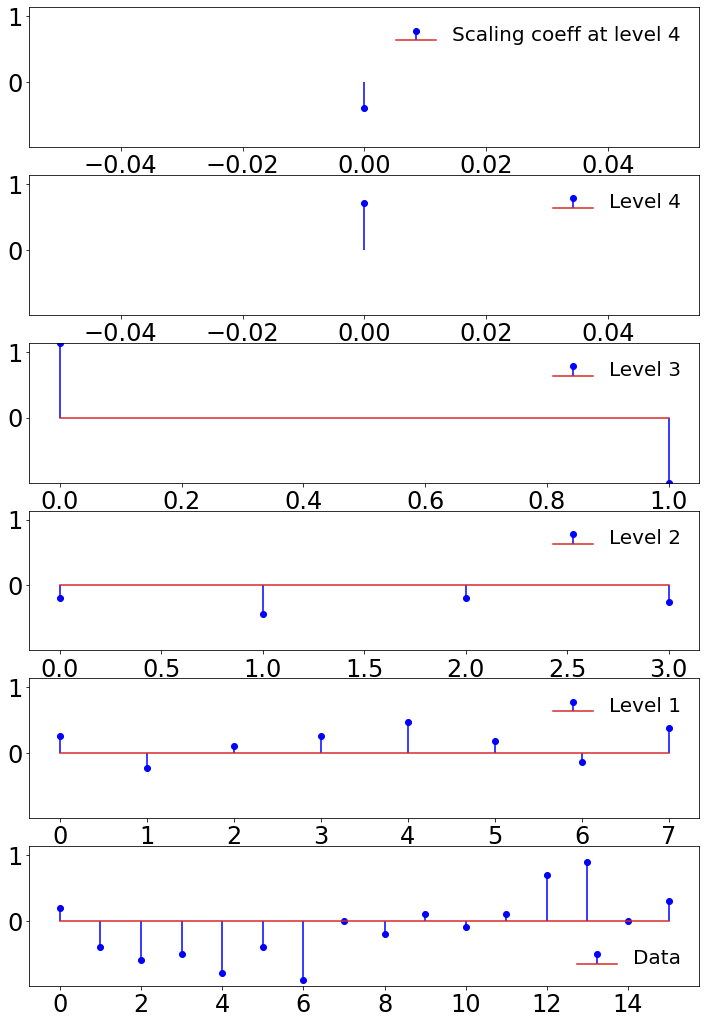

In [43]:
plt.figure(1, figsize=(12, 18))
J = 4

# Plot data
plt.subplot2grid((J + 2, 1), (J + 1, 0))
plt.stem(np.arange(0, 16), X, 'b-', markerfmt='bo', label='Data')
plt.ylim((np.min(W), np.max(W)))
plt.legend(loc=4, frameon=False)

# Plot wavelet coefficients at each level
for j in range(1, J + 1):
    Wj = W[- int(N / (2 ** (j - 1))) : - int(N / 2 ** j)]
    plt.subplot2grid((J + 2, 1), (J + 1 - j, 0))
    plt.stem(np.arange(0, int(N / (2 ** j))), Wj, 'b-', markerfmt='bo', label='Level ' + str(j))
    plt.ylim((np.min(W), np.max(W)))
    plt.legend(loc=1, frameon=False)

# Plot scaling coefficients for the last level
Vj = W[- int(N / (2 ** J)) : ]
plt.subplot2grid((J + 2, 1), (0, 0))
plt.stem(np.arange(0, int(N / (2 ** J))), Vj, 'b-', markerfmt='bo', label='Scaling coeff at level ' + str(J))
plt.ylim((np.min(W), np.max(W)))
plt.legend(loc=1, frameon=False)

plt.show()

## 3) Details and smooths

In [29]:
(D, S) = DWT.get_DS(X, W, 'D4', 4)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


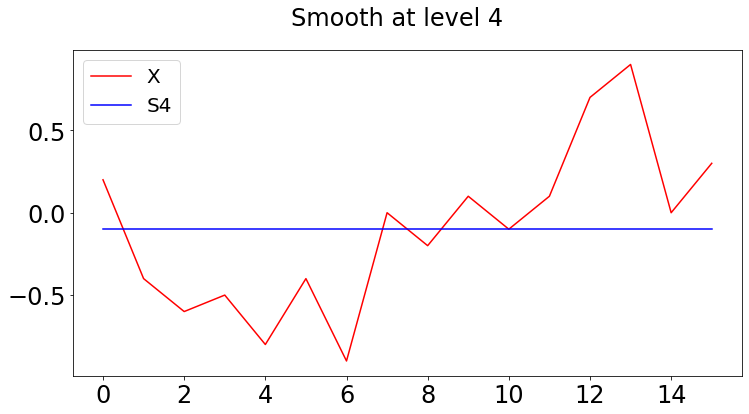

In [30]:
fig15 = plt.figure(15, figsize=(12, 6))
plt.plot(np.arange(0, 16), X, 'r-', label='X')
plt.plot(np.arange(0, 16), S[4], 'b-', label='S4')
plt.suptitle('Smooth at level 4', fontsize=24)
plt.legend()
plt.savefig('../tutorial/figures/Figure16.eps', format='eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


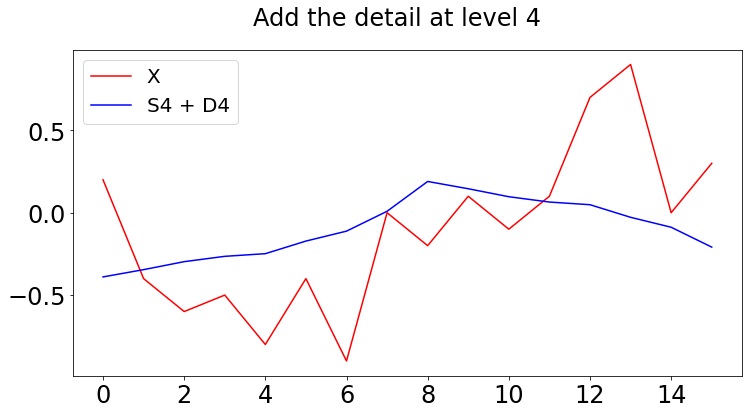

In [31]:
fig16 = plt.figure(16, figsize=(12, 6))
plt.plot(np.arange(0, 16), X, 'r-', label='X')
plt.plot(np.arange(0, 16), S[4] + D[3], 'b-', label='S4 + D4')
plt.suptitle('Add the detail at level 4', fontsize=24)
plt.legend()
plt.savefig('../tutorial/figures/Figure17.eps', format='eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


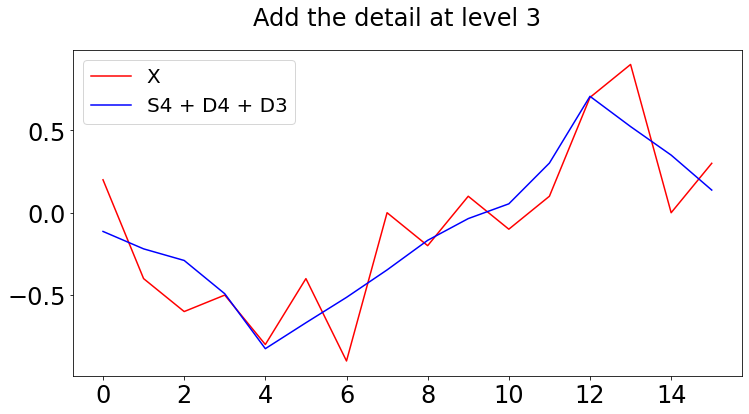

In [32]:
fig17 = plt.figure(17, figsize=(12, 6))
plt.plot(np.arange(0, 16), X, 'r-', label='X')
plt.plot(np.arange(0, 16), S[4] + D[3] + D[2], 'b-', label='S4 + D4 + D3')
plt.suptitle('Add the detail at level 3', fontsize=24)
plt.legend()
plt.savefig('../tutorial/figures/Figure18.eps', format='eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


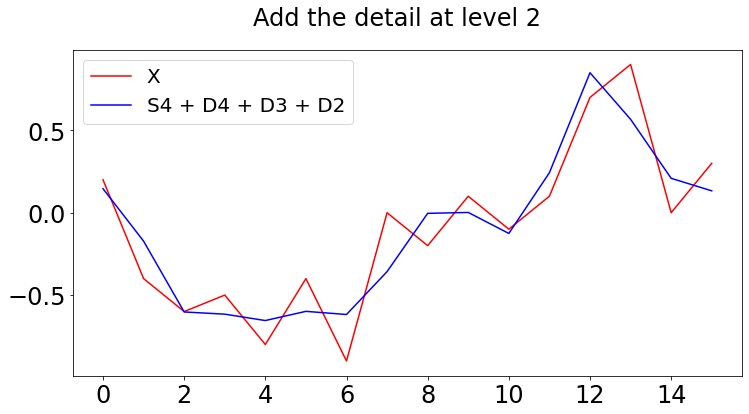

In [33]:
fig18 = plt.figure(18, figsize=(12, 6))
plt.plot(np.arange(0, 16), X, 'r-', label='X')
plt.plot(np.arange(0, 16), S[4] + D[3] + D[2] + D[1], 'b-', label='S4 + D4 + D3 + D2')
plt.suptitle('Add the detail at level 2', fontsize=24)
plt.legend()
plt.savefig('../tutorial/figures/Figure19.eps', format='eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


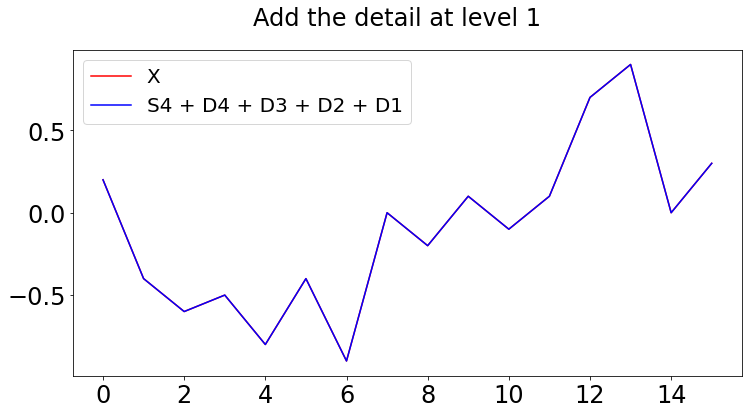

In [34]:
fig19 = plt.figure(19, figsize=(12, 6))
plt.plot(np.arange(0, 16), X, 'r-', label='X')
plt.plot(np.arange(0, 16), S[4] + D[3] + D[2] + D[1] + D[0], 'b-', label='S4 + D4 + D3 + D2 + D1')
plt.suptitle('Add the detail at level 1', fontsize=24)
plt.legend()
plt.savefig('../tutorial/figures/Figure20.eps', format='eps')
plt.show()

# IV The Maximal Overlap Discrete Wavelet Transform

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

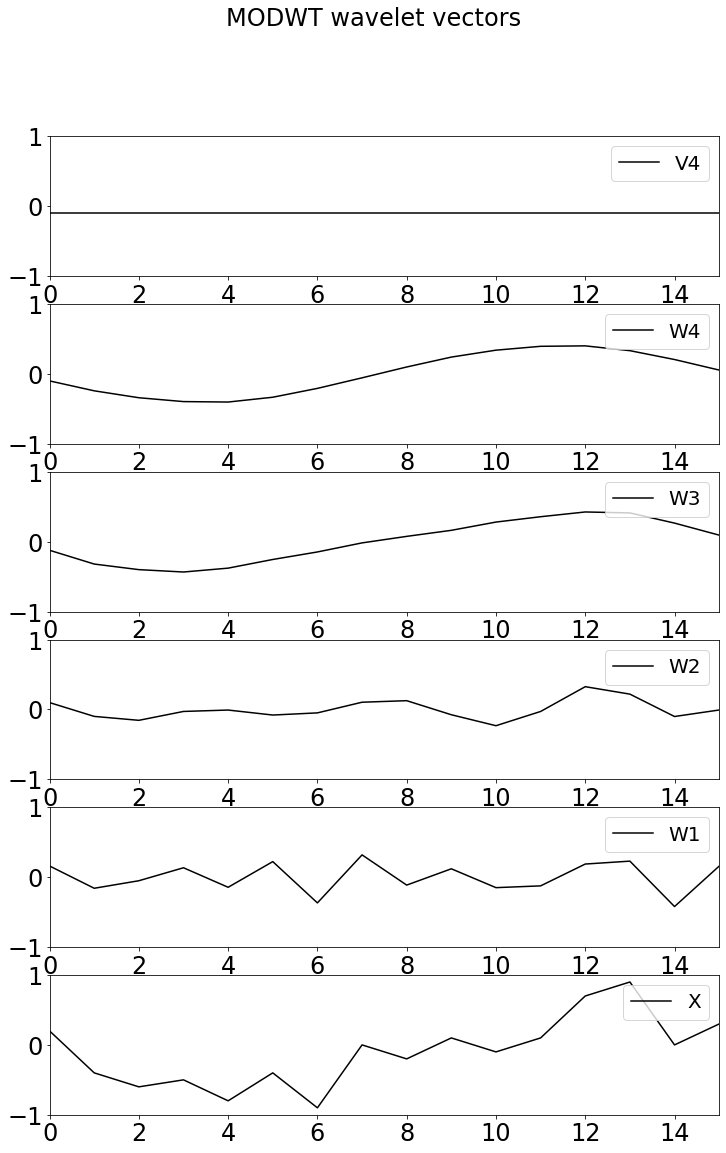

In [35]:
N = np.shape(X)[0]
(W, V) = MODWT.pyramid(X, 'LA8', 4)
(nuH, nuG) = DWT.get_nu('LA8', 4)
plt.figure(20, figsize=(12, 18))
plt.subplot2grid((6, 1), (5, 0))
t = np.arange(0, N)
plt.plot(t, X, 'k', label='X')
plt.xlim([np.min(t), np.max(t)])
plt.ylim([-1.0, 1.0])
plt.legend(loc=1)
for j in range(0, 4):
    plt.subplot2grid((6, 1), (4 - j, 0))
    plt.plot(t, np.roll(W[j], nuH[j]), 'k', label='W' + str(j + 1))
    plt.xlim([np.min(t), np.max(t)])
    plt.ylim([-1.0, 1.0])
    plt.legend(loc=1)
plt.subplot2grid((6, 1), (0, 0))
plt.plot(t, np.roll(V, nuG[3]), 'k', label='V4')
plt.xlim([np.min(t), np.max(t)])
plt.ylim([-1.0, 1.0])
plt.legend(loc=1)
plt.suptitle('MODWT wavelet vectors', fontsize=24)
plt.savefig('../tutorial/figures/Figure21.eps', format='eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

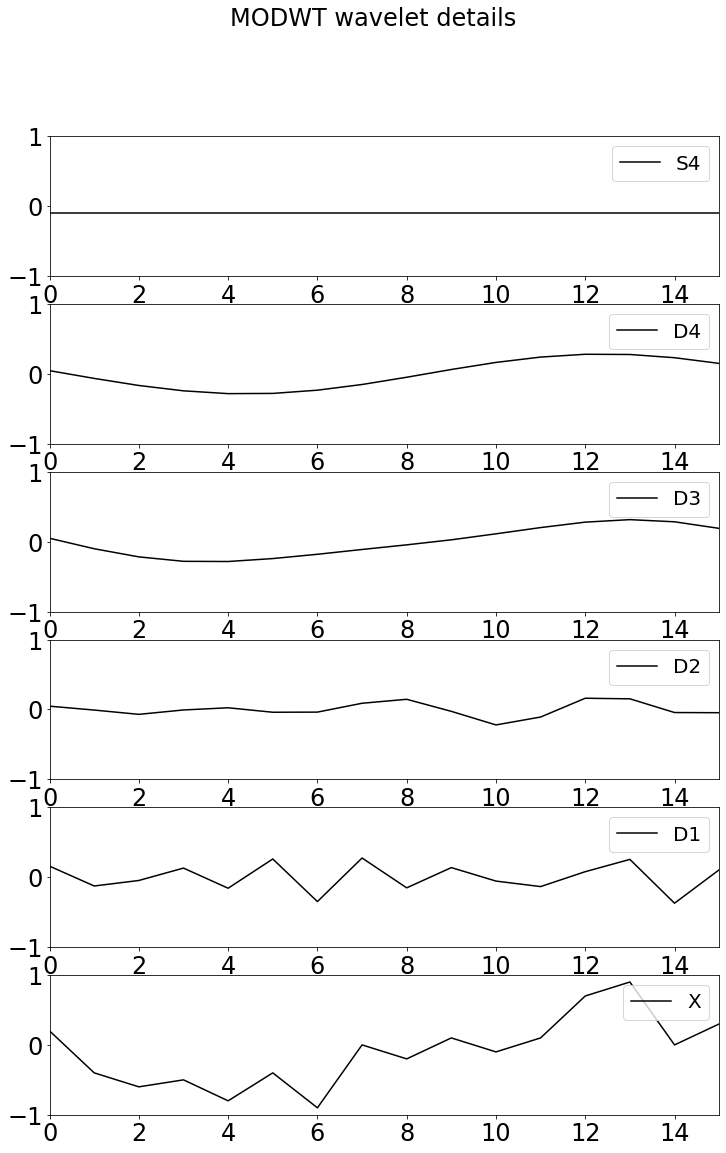

In [36]:
(D, S) = MODWT.get_DS(X, W, 'LA8', 4)
plt.figure(21, figsize=(12, 18))
plt.subplot2grid((6, 1), (5, 0))
t = np.arange(0, N)
plt.plot(t, X, 'k', label='X')
plt.xlim([np.min(t), np.max(t)])
plt.ylim([-1.0, 1.0])
plt.legend(loc=1)
for j in range(0, 4):
    plt.subplot2grid((6, 1), (4 - j, 0))
    plt.plot(t, D[j], 'k', label='D' + str(j + 1))
    plt.xlim([np.min(t), np.max(t)])
    plt.ylim([-1.0, 1.0])
    plt.legend(loc=1)
plt.subplot2grid((6, 1), (0, 0))
plt.plot(t, S[4], 'k', label='S4')
plt.xlim([np.min(t), np.max(t)])
plt.ylim([-1.0, 1.0])
plt.legend(loc=1)
plt.suptitle('MODWT wavelet details', fontsize=24)
plt.savefig('../tutorial/figures/Figure22.eps', format='eps')
plt.show()